Some simple statistics

In [2]:
import os
import glob
import numpy as np # for arrays
import pandas as pd # for importing csv files
from pathlib import Path
import matplotlib.pyplot as plt

Read file extensions and plot them. I expect m4a, mp3, wav and opus

In [30]:
measCsv=r'C:\Users\t_ziemer\Desktop\techno-csv'
folds=glob.glob(str(measCsv+'\\*'))
# dictionary of all features:
features = {1: 'PhaseSpace',
            2: 'ChannelCorrelation',
            3: 'PeakMeter',
            4: 'RMS',
            5: 'CrestFactor',
            6: 'PhaseSpaceLow',
            7: 'ChannelCorrelationLow',
            8: 'PeakMeterLow',
            9: 'RMSLow',
            10: 'CrestFactorLow',
            11: 'PhaseSpaceMid',
            12: 'ChannelCorrelationMid',
            13: 'PeakMeterMid',
            14: 'RMSMid',
            15: 'CrestFactorMid',
            16: 'PhaseSpaceHigh',
            17: 'ChannelCorrelationHigh',
            18: 'PeakMeterHigh',
            19: 'RMSHigh',
            20: 'CrestFactorHigh',
            21: 'bpm'}

# selection of preferred features
nfeatures = {0: 1,
             1: 2,
             2: 3,
             3: 4,
             4:5, 5:6, 6:7, 7:8, 8:9, 9:10, 10:11, 11:12, 12:13, 13:14, 14:15, 15:16, 16:17, 17:18, 18:19, 19:20, 20:21
            }
# shall we take each feratures' 'mean', 'median', standard deviation ('std'), skewness ('skew'), or kurtosis ('kurt')?
#what=['median','median','median','median','median','median','median','median','median','median','median','median','median','median','median','median','median','median','median','median','median','median','median']
what=['median','median','median','median','median','median','median','median','median','median','median','median','median','median','median','median','median','median','median','median','median','median','median']
numfeatures = len(nfeatures)

In [51]:
# median: takes forever, only works when ALL filenames are correct

train_X = []
target = []
phase_space = []
phase_space_low = []
phase_space_mid = []
phase_space_high = []

channel_corr = []
channel_corr_low = []
channel_corr_mid = []
channel_corr_high = []

peak_meter = []
peak_meter_low = []
peak_meter_mid = []
peak_meter_high = []

rms_meter = []
rms_meter_low = []
rms_meter_mid = []
rms_meter_high = []

crest_factor = []
crest_factor_low = []
crest_factor_mid = []
crest_factor_high = []

color_map = {}
nation = []
year = []
filename = []

# give the classes their names
labels=['Germany','USA']

for cl, fold in enumerate(folds):
    files = glob.glob(str(fold+'\*.csv'))
    numfiles = len(fold)
    lal1 = np.empty((numfiles, numfeatures))
    #print(lal1)
    for j, f in enumerate(files):
        la = pd.read_csv(f, index_col=0)
        phase_space.append(la[features[nfeatures[0]]].median())
        channel_corr.append(la[features[nfeatures[1]]].median())
        peak_meter.append(la[features[nfeatures[2]]].median())
        rms_meter.append(la[features[nfeatures[3]]].median())
        crest_factor.append(la[features[nfeatures[4]]].median())
        
        phase_space_low.append(la[features[nfeatures[5]]].median())
        channel_corr_low.append(la[features[nfeatures[6]]].median())
        peak_meter_low.append(la[features[nfeatures[7]]].median())
        rms_meter_low.append(la[features[nfeatures[8]]].median())
        crest_factor_low.append(la[features[nfeatures[9]]].median())
        
        phase_space_mid.append(la[features[nfeatures[10]]].median())
        channel_corr_mid.append(la[features[nfeatures[11]]].median())
        peak_meter_mid.append(la[features[nfeatures[12]]].median())
        rms_meter_mid.append(la[features[nfeatures[13]]].median())
        crest_factor_mid.append(la[features[nfeatures[14]]].median())
        
        phase_space_high.append(la[features[nfeatures[15]]].median())
        channel_corr_high.append(la[features[nfeatures[16]]].median())
        peak_meter_high.append(la[features[nfeatures[17]]].median())
        rms_meter_high.append(la[features[nfeatures[18]]].median())
        crest_factor_high.append(la[features[nfeatures[19]]].median())
        
        train_X.append(la[features[nfeatures[20]]].median())        
        
        #print(f)
        if f[-5]=='s':
            #int(f[-13:-9])
            #print(int(f[-13:-9]))
            year.append(int(f[-14:-10]))
            opus = -16
        else:
            year.append(int(f[-13:-9]))
            opus = -15
        if fold[-1]=='y':
            filename.append(f[45:opus])# depends on absolute file path
        else:
            filename.append(f[41:opus])# depends on absolute file path
            #print(f[45:-16])
        nation.append(labels[cl])

KeyboardInterrupt: 

In [7]:
# ensures that every song has a valid year
nan_indices = [index for index, value in enumerate(train_X) if np.isnan(value)]
print(nan_indices)

[]


In [8]:
# produces a massive csv file that contains all releven info
matrix = np.array([filename,nation,year,phase_space,channel_corr,peak_meter,rms_meter,crest_factor,phase_space_low,channel_corr_low,peak_meter_low,rms_meter_low,crest_factor_low,phase_space_mid,channel_corr_mid,peak_meter_mid,rms_meter_mid,crest_factor_mid,phase_space_high,channel_corr_high,peak_meter_high,rms_meter_high,crest_factor_high,train_X])
matrix = matrix.transpose()
df = pd.DataFrame(matrix, columns=['Song','Nation', 'Year','PhaseSpace','ChannelCorrelation','PeakMeter','RMS','CrestFactor','PhaseSpaceLow','ChannelCorrelationLow','PeakMeterLow','RMSLow','CrestFactorLow','PhaseSpaceMid','ChannelCorrelationMid','PeakMeterMid','RMSMid','CrestFactorMid','PhaseSpaceHigh','ChannelCorrelationHigh','PeakMeterHigh','RMSHigh','CrestFactorHigh','bpm'])
csvfilename = r'C:\python\gits\early-techno\matrix25-02-22-all21median.csv'

# Save the array to a CSV file
df.to_csv(csvfilename, index=False, header=True)

Means:

In [9]:
# means: takes forever, only works when ALL filenames are correct
train_X = []
target = []
phase_space = []
phase_space_low = []
phase_space_mid = []
phase_space_high = []

channel_corr = []
channel_corr_low = []
channel_corr_mid = []
channel_corr_high = []

peak_meter = []
peak_meter_low = []
peak_meter_mid = []
peak_meter_high = []

rms_meter = []
rms_meter_low = []
rms_meter_mid = []
rms_meter_high = []

crest_factor = []
crest_factor_low = []
crest_factor_mid = []
crest_factor_high = []

color_map = {}
nation = []
year = []
filename = []

# give the classes their names
labels=['Germany','USA']

for cl, fold in enumerate(folds):
    files = glob.glob(str(fold+'\*.csv'))
    numfiles = len(fold)
    lal1 = np.empty((numfiles, numfeatures))
    #print(lal1)
    for j, f in enumerate(files):
        la = pd.read_csv(f, index_col=0)
        phase_space.append(la[features[nfeatures[0]]].mean())
        channel_corr.append(la[features[nfeatures[1]]].mean())
        peak_meter.append(la[features[nfeatures[2]]].mean())
        rms_meter.append(la[features[nfeatures[3]]].mean())
        crest_factor.append(la[features[nfeatures[4]]].mean())
        
        phase_space_low.append(la[features[nfeatures[5]]].mean())
        channel_corr_low.append(la[features[nfeatures[6]]].mean())
        peak_meter_low.append(la[features[nfeatures[7]]].mean())
        rms_meter_low.append(la[features[nfeatures[8]]].mean())
        crest_factor_low.append(la[features[nfeatures[9]]].mean())
        
        phase_space_mid.append(la[features[nfeatures[10]]].mean())
        channel_corr_mid.append(la[features[nfeatures[11]]].mean())
        peak_meter_mid.append(la[features[nfeatures[12]]].mean())
        rms_meter_mid.append(la[features[nfeatures[13]]].mean())
        crest_factor_mid.append(la[features[nfeatures[14]]].mean())
        
        phase_space_high.append(la[features[nfeatures[15]]].mean())
        channel_corr_high.append(la[features[nfeatures[16]]].mean())
        peak_meter_high.append(la[features[nfeatures[17]]].mean())
        rms_meter_high.append(la[features[nfeatures[18]]].mean())
        crest_factor_high.append(la[features[nfeatures[19]]].mean())
        
        train_X.append(la[features[nfeatures[20]]].mean())        
        
        #print(f)
        if f[-5]=='s':
            #int(f[-13:-9])
            #print(int(f[-13:-9]))
            year.append(int(f[-14:-10]))
            opus = -16
        else:
            year.append(int(f[-13:-9]))
            opus = -15
        if fold[-1]=='y':
            filename.append(f[45:opus])# depends on absolute file path
        else:
            filename.append(f[41:opus])# depends on absolute file path
            #print(f[45:-16])
        nation.append(labels[cl])
        
matrix = np.array([filename,nation,year,phase_space,channel_corr,peak_meter,rms_meter,crest_factor,phase_space_low,channel_corr_low,peak_meter_low,rms_meter_low,crest_factor_low,phase_space_mid,channel_corr_mid,peak_meter_mid,rms_meter_mid,crest_factor_mid,phase_space_high,channel_corr_high,peak_meter_high,rms_meter_high,crest_factor_high,train_X])
matrix = matrix.transpose()
df = pd.DataFrame(matrix, columns=['Song','Nation', 'Year','PhaseSpace','ChannelCorrelation','PeakMeter','RMS','CrestFactor','PhaseSpaceLow','ChannelCorrelationLow','PeakMeterLow','RMSLow','CrestFactorLow','PhaseSpaceMid','ChannelCorrelationMid','PeakMeterMid','RMSMid','CrestFactorMid','PhaseSpaceHigh','ChannelCorrelationHigh','PeakMeterHigh','RMSHigh','CrestFactorHigh','bpm'])
csvfilename = r'C:\python\gits\early-techno\matrix25-02-22-all21mean.csv'

# Save the array to a CSV file
df.to_csv(csvfilename, index=False, header=True)

SDs:

In [11]:
# SDs: takes forever, ...
train_X = []
target = []
phase_space = []
phase_space_low = []
phase_space_mid = []
phase_space_high = []

channel_corr = []
channel_corr_low = []
channel_corr_mid = []
channel_corr_high = []

peak_meter = []
peak_meter_low = []
peak_meter_mid = []
peak_meter_high = []

rms_meter = []
rms_meter_low = []
rms_meter_mid = []
rms_meter_high = []

crest_factor = []
crest_factor_low = []
crest_factor_mid = []
crest_factor_high = []

color_map = {}
nation = []
year = []
filename = []

# give the classes their names
labels=['Germany','USA']

for cl, fold in enumerate(folds):
    files = glob.glob(str(fold+'\*.csv'))
    numfiles = len(fold)
    lal1 = np.empty((numfiles, numfeatures))
    #print(lal1)
    for j, f in enumerate(files):
        la = pd.read_csv(f, index_col=0)
        phase_space.append(la[features[nfeatures[0]]].std())
        channel_corr.append(la[features[nfeatures[1]]].std())
        peak_meter.append(la[features[nfeatures[2]]].std())
        rms_meter.append(la[features[nfeatures[3]]].std())
        crest_factor.append(la[features[nfeatures[4]]].std())
        
        phase_space_low.append(la[features[nfeatures[5]]].std())
        channel_corr_low.append(la[features[nfeatures[6]]].std())
        peak_meter_low.append(la[features[nfeatures[7]]].std())
        rms_meter_low.append(la[features[nfeatures[8]]].std())
        crest_factor_low.append(la[features[nfeatures[9]]].std())
        
        phase_space_mid.append(la[features[nfeatures[10]]].std())
        channel_corr_mid.append(la[features[nfeatures[11]]].std())
        peak_meter_mid.append(la[features[nfeatures[12]]].std())
        rms_meter_mid.append(la[features[nfeatures[13]]].std())
        crest_factor_mid.append(la[features[nfeatures[14]]].std())
        
        phase_space_high.append(la[features[nfeatures[15]]].std())
        channel_corr_high.append(la[features[nfeatures[16]]].std())
        peak_meter_high.append(la[features[nfeatures[17]]].std())
        rms_meter_high.append(la[features[nfeatures[18]]].std())
        crest_factor_high.append(la[features[nfeatures[19]]].std())       
        
        #print(f)
        if f[-5]=='s':
            #int(f[-13:-9])
            #print(int(f[-13:-9]))
            year.append(int(f[-14:-10]))
            opus = -16
        else:
            year.append(int(f[-13:-9]))
            opus = -15
        if fold[-1]=='y':
            filename.append(f[45:opus])# depends on absolute file path
        else:
            filename.append(f[41:opus])# depends on absolute file path
            #print(f[45:-16])
        nation.append(labels[cl])
        
matrix = np.array([filename,nation,year,phase_space,channel_corr,peak_meter,rms_meter,crest_factor,phase_space_low,channel_corr_low,peak_meter_low,rms_meter_low,crest_factor_low,phase_space_mid,channel_corr_mid,peak_meter_mid,rms_meter_mid,crest_factor_mid,phase_space_high,channel_corr_high,peak_meter_high,rms_meter_high,crest_factor_high])
matrix = matrix.transpose()
df = pd.DataFrame(matrix, columns=['Song','Nation', 'Year','PhaseSpace','ChannelCorrelation','PeakMeter','RMS','CrestFactor','PhaseSpaceLow','ChannelCorrelationLow','PeakMeterLow','RMSLow','CrestFactorLow','PhaseSpaceMid','ChannelCorrelationMid','PeakMeterMid','RMSMid','CrestFactorMid','PhaseSpaceHigh','ChannelCorrelationHigh','PeakMeterHigh','RMSHigh','CrestFactorHigh'])
csvfilename = r'C:\python\gits\early-techno\matrix25-02-22-all21sd.csv'

# Save the array to a CSV file
df.to_csv(csvfilename, index=False, header=True)

Skewness

In [53]:
# skwew: takes forever, ...
train_X = []
target = []
phase_space = []
phase_space_low = []
phase_space_mid = []
phase_space_high = []

channel_corr = []
channel_corr_low = []
channel_corr_mid = []
channel_corr_high = []

peak_meter = []
peak_meter_low = []
peak_meter_mid = []
peak_meter_high = []

rms_meter = []
rms_meter_low = []
rms_meter_mid = []
rms_meter_high = []

crest_factor = []
crest_factor_low = []
crest_factor_mid = []
crest_factor_high = []

color_map = {}
nation = []
year = []
filename = []

# give the classes their names
labels=['Germany','USA']

for cl, fold in enumerate(folds):
    files = glob.glob(str(fold+'\*.csv'))
    numfiles = len(fold)
    lal1 = np.empty((numfiles, numfeatures))
    #print(lal1)
    for j, f in enumerate(files):
        la = pd.read_csv(f, index_col=0)
        phase_space.append(la[features[nfeatures[0]]].skew())
        channel_corr.append(la[features[nfeatures[1]]].skew())
        peak_meter.append(la[features[nfeatures[2]]].skew())
        rms_meter.append(la[features[nfeatures[3]]].skew())
        crest_factor.append(la[features[nfeatures[4]]].skew())
        
        phase_space_low.append(la[features[nfeatures[5]]].skew())
        channel_corr_low.append(la[features[nfeatures[6]]].skew())
        peak_meter_low.append(la[features[nfeatures[7]]].skew())
        rms_meter_low.append(la[features[nfeatures[8]]].skew())
        crest_factor_low.append(la[features[nfeatures[9]]].skew())
        
        phase_space_mid.append(la[features[nfeatures[10]]].skew())
        channel_corr_mid.append(la[features[nfeatures[11]]].skew())
        peak_meter_mid.append(la[features[nfeatures[12]]].skew())
        rms_meter_mid.append(la[features[nfeatures[13]]].skew())
        crest_factor_mid.append(la[features[nfeatures[14]]].skew())
        
        phase_space_high.append(la[features[nfeatures[15]]].skew())
        channel_corr_high.append(la[features[nfeatures[16]]].skew())
        peak_meter_high.append(la[features[nfeatures[17]]].skew())
        rms_meter_high.append(la[features[nfeatures[18]]].skew())
        crest_factor_high.append(la[features[nfeatures[19]]].skew())       
        
        #print(f)
        if f[-5]=='s':
            #int(f[-13:-9])
            #print(int(f[-13:-9]))
            year.append(int(f[-14:-10]))
            opus = -16
        else:
            year.append(int(f[-13:-9]))
            opus = -15
        if fold[-1]=='y':
            filename.append(f[45:opus])# depends on absolute file path
        else:
            filename.append(f[41:opus])# depends on absolute file path
            #print(f[45:-16])
        nation.append(labels[cl])
        
matrix = np.array([filename,nation,year,phase_space,channel_corr,peak_meter,rms_meter,crest_factor,phase_space_low,channel_corr_low,peak_meter_low,rms_meter_low,crest_factor_low,phase_space_mid,channel_corr_mid,peak_meter_mid,rms_meter_mid,crest_factor_mid,phase_space_high,channel_corr_high,peak_meter_high,rms_meter_high,crest_factor_high])
matrix = matrix.transpose()
df = pd.DataFrame(matrix, columns=['Song','Nation', 'Year','PhaseSpace','ChannelCorrelation','PeakMeter','RMS','CrestFactor','PhaseSpaceLow','ChannelCorrelationLow','PeakMeterLow','RMSLow','CrestFactorLow','PhaseSpaceMid','ChannelCorrelationMid','PeakMeterMid','RMSMid','CrestFactorMid','PhaseSpaceHigh','ChannelCorrelationHigh','PeakMeterHigh','RMSHigh','CrestFactorHigh'])
csvfilename = r'C:\python\gits\early-techno\matrix25-02-24-all21skew.csv'

# Save the array to a CSV file
df.to_csv(csvfilename, index=False, header=True)

In [ ]:
#tempi = np.array([filename,nation,year,train_X])
#tempi = tempi.transpose()
#df = pd.DataFrame(tempi, columns=['Song','Nation', 'Year', 'BPM'])
#csvfilename = r'C:\python\gits\early-techno\tempi25-01-16.csv'

# Save the array to a CSV file
#df.to_csv(csvfilename, index=False, header=True)

In [31]:
import numpy as np # for arrays
import pandas as pd # for importing csv files
from pathlib import Path
csvfilename = r'C:\python\gits\early-techno\matrix25-02-22-all21median.csv'
#csvfilename = r'C:\python\gits\early-techno\matrix25-02-22-all21sd.csv'
#csvfilename = r'C:\python\gits\early-techno\matrix25-02-22-all21mean.csv'
#csvfilename = r'C:\python\gits\early-techno\matrix25-02-24-all21skew.csv'
df = pd.read_csv(csvfilename, index_col=False)

Check for Multicollinearity:

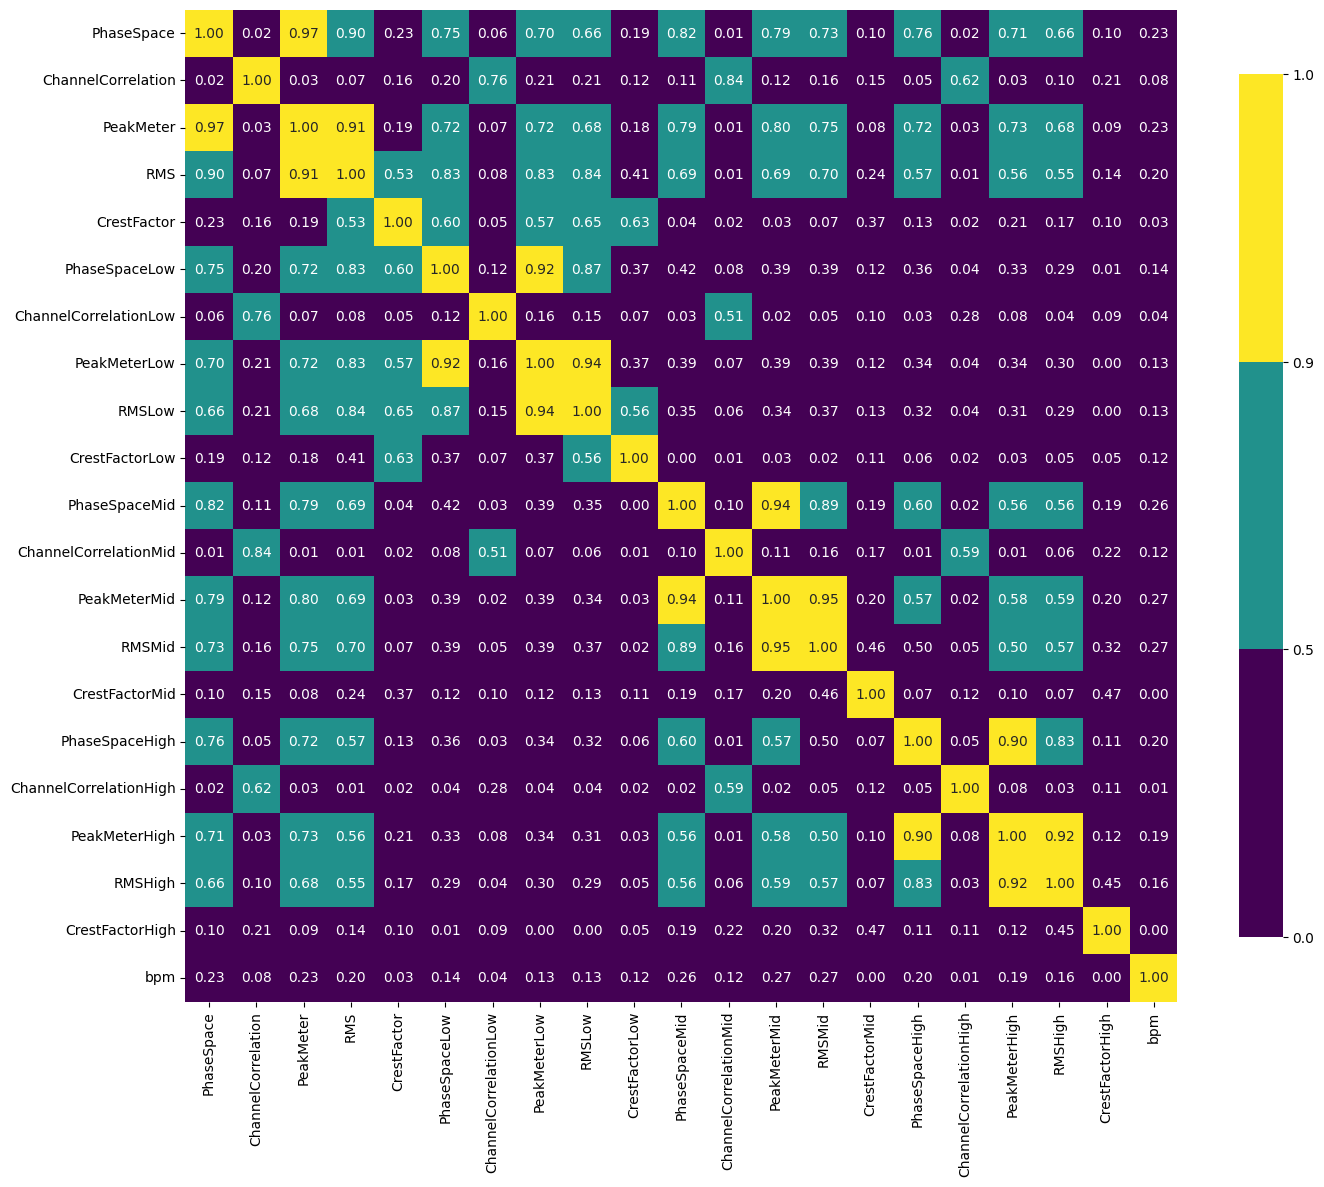

In [82]:
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.cm import get_cmap

df_selected = df.iloc[:, 3:]
correlation_matrix = df_selected.corr()

# Take the absolute value
abs_correlation_matrix = correlation_matrix.abs()

# Set up the matplotlib figure
plt.figure(figsize=(16, 14))

# Get viridis color map and sample specific colors for the defined ranges
viridis_cmap = get_cmap('viridis')
colors = [viridis_cmap(viridis_cmap.N // 4 * 0),   # Blue (lower range)
          viridis_cmap(viridis_cmap.N // 4 * 2),   # Green (middle range)
          viridis_cmap(viridis_cmap.N - 1)]         # Yellow (upper range)

# Create custom colormap and normalization
cmap = ListedColormap(colors)
boundaries = [0, 0.5, 0.9, 1]  # Define the boundaries for the color categories
norm = BoundaryNorm(boundaries, ncolors=len(colors), clip=False)

# Draw the heatmap
sns.heatmap(abs_correlation_matrix, 
            annot=True,         # Annotate with the correlation values
            fmt=".2f",         # Format to two decimal places
            cmap=cmap,         # Use the custom colormap
            norm=norm,         # Use the custom normalization
            square=True,       # Make cells square
            cbar_kws={"shrink": .8})  # Color bar size

# Title and labels
#plt.title('Discretized Absolute Spearman Correlation Matrix using Viridis')
plt.savefig('correlation_matrix_medianstight.pdf', format='pdf',bbox_inches='tight')
plt.show()

In [ ]:
# Only during data preparation: spuckt Dateien mit fehlerhaftem Namen aus:
import numpy as np # for arrays
import pandas as pd # for importing csv files
from pathlib import Path

train_X = []
target = []
color_map = {}
nation = []
year = []
filename = []
ff = 0

# give the classes their names
labels=['Germany','USA']

for cl, fold in enumerate(folds):
    files = glob.glob(str(fold+'\*.csv'))
    numfiles = len(fold)
    lal1 = np.empty((numfiles, numfeatures))
    for j, f in enumerate(files):
        if f[-5]=='s':
            try:
                int_value = int(f[-14:-10])
            except ValueError:
                print(f)
        else:
            try:
                int_value = int(f[-13:-9])
            except ValueError:
                print(f)

In [49]:
import plotly.express as px

fig = px.box(
    df,
    x='Nation',
    y='bpm',
    hover_name='Song', 
    hover_data={'Song': False, 'bpm' : False, 'Nation' : False},  # Set this to show only the Song
    color='Nation',  # Allow separate coloring based on Nation
    color_discrete_sequence=['blue', 'red', 'green']  # Adjust as needed for your nations
)

# Customize the layout
fig.update_layout(
    #title='Boxplot of BPM per Nation',
    xaxis_title='Nation',
    yaxis_title='BPM',xaxis_title_font=dict(size=20),
    yaxis_title_font=dict(size=20),
    xaxis_tickfont=dict(size=16),  # Increase the size of x-axis tick labels
    yaxis_tickfont=dict(size=16),legend=dict(font=dict(size=16))
)

# Show the plot
fig.show()

In [29]:
import plotly.io as pio
#
# Using write_html method
pio.write_html(fig, file=r'C:\python\maps\boxplotnations_bpm.html')

In [7]:
import plotly.graph_objects as go
# Assume 'filename', 'nation', 'year', 'train_X' are defined appropriately
# tempi = np.array([filename, nation, year, train_X])
# tempi = tempi.transpose()
# df = pd.DataFrame(tempi, columns=['Song', 'Nation', 'Year', 'BPM'])
df['Year'] = pd.to_numeric(df['Year'])
df['BPM'] = pd.to_numeric(df['BPM'])

# Create a figure object
fig = go.Figure()

# Add boxplots for BPM by Year, separated by Nation
nations = df['Nation'].unique()  # Get unique nations
for nation in nations:
    nation_data = df[df['Nation'] == nation]  # Filter data for the specific nation
    # Create the box plot with hover info displaying the song names
    fig.add_trace(go.Box(y=nation_data['BPM'], 
                         x=nation_data['Year'],
                         name=f'{nation} BPM',
                         boxmean='sd',  # Show mean and standard deviation
                         marker=dict(opacity=0.6),
                         hoverinfo='text',  # Use text for hover
                         hovertext=nation_data['Song']))  # Set hovertext to the song names

# Update layout with titles
fig.update_layout(#title='Boxplots of BPM by Year with Individual Data Points',
                  xaxis_title='Year',
                  yaxis_title='BPM',
                  boxmode='group',
    xaxis_title_font=dict(size=20),
    yaxis_title_font=dict(size=20),
    xaxis_tickfont=dict(size=16),  # Increase the size of x-axis tick labels
    yaxis_tickfont=dict(size=16),
legend=dict(font=dict(size=16)))  # Group boxplots together

# Show the plot
fig.show()

In [38]:
pio.write_html(fig, file=r'C:\python\maps\boxplotnations_bpm_over_year.html')

In [38]:
# two-way MANOVA:
from statsmodels.multivariate.manova import MANOVA

#'Song','Nation', 'Year','PhaseSpace','ChannelCorrelation','PeakMeter','RMS','CrestFactor','PhaseSpaceLow','ChannelCorrelationLow','PeakMeterLow','RMSLow','CrestFactorLow','PhaseSpaceMid','ChannelCorrelationMid','PeakMeterMid','RMSMid','CrestFactorMid','PhaseSpaceHigh','ChannelCorrelationHigh','PeakMeterHigh','RMSHigh','CrestFactorHigh'
# Conducting MANOVA with interaction term
manova = MANOVA.from_formula('PhaseSpace + ChannelCorrelation + PeakMeter + RMS + CrestFactor + PhaseSpaceLow + ChannelCorrelationLow + PeakMeterLow + RMSLow + CrestFactorLow + PhaseSpaceMid + ChannelCorrelationMid + PeakMeterMid + RMSMid + CrestFactorMid + PhaseSpaceHigh + ChannelCorrelationHigh + PeakMeterHigh + RMSHigh + CrestFactorHigh + bpm ~ Nation * Year', data=df)

# Print the results
print(manova.mv_test())

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept        Value   Num DF   Den DF  F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda 0.7615 21.0000 9005.0000 134.2924 0.0000
         Pillai's trace 0.2385 21.0000 9005.0000 134.2924 0.0000
 Hotelling-Lawley trace 0.3132 21.0000 9005.0000 134.2924 0.0000
    Roy's greatest root 0.3132 21.0000 9005.0000 134.2924 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
          Nation         Value   Num DF   Den DF  F Value Pr > F
----------------------------------------------------------------
           Wilks' lambda 0.8573 21.0000 9005.0000 71.3565 0.0000
          Pillai's trace 0.1427 21.0000 9005.

In [41]:
from statsmodels.multivariate.manova import MANOVA
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# Step 1: Perform MANOVA
#manova = MANOVA.from_formula('BPM + PhSp + ChCo + Peak ~ Nation * Year', data=df)
manova = MANOVA.from_formula('PhaseSpace + ChannelCorrelation + PeakMeter + RMS + CrestFactor + PhaseSpaceLow + ChannelCorrelationLow + PeakMeterLow + RMSLow + CrestFactorLow + PhaseSpaceMid + ChannelCorrelationMid + PeakMeterMid + RMSMid + CrestFactorMid + PhaseSpaceHigh + ChannelCorrelationHigh + PeakMeterHigh + RMSHigh + CrestFactorHigh + bpm ~ Nation * Year', data=df)
print(manova.mv_test())

# Step 2: Conduct Univariate ANOVAs for each dependent variable
dependent_vars = ['PhaseSpace','ChannelCorrelation','PeakMeter','RMS','CrestFactor','PhaseSpaceLow','ChannelCorrelationLow','PeakMeterLow','RMSLow','CrestFactorLow','PhaseSpaceMid','ChannelCorrelationMid','PeakMeterMid','RMSMid','CrestFactorMid','PhaseSpaceHigh','ChannelCorrelationHigh','PeakMeterHigh','RMSHigh','CrestFactorHigh', 'bpm']

# Number of comparisons (this will be important for Bonferroni adjustment)
num_comparisons = len(dependent_vars)

for dep_var in dependent_vars:
    print(f"\nANOVA results for {dep_var}:")
    anova = ols(f'{dep_var} ~ Nation * Year', data=df).fit()
    anova_table = sm.stats.anova_lm(anova, typ=2)
    print(anova_table)

    # If ANOVA result is significant, conduct post-hoc test
#    if anova_table['PR(>F)'][0] < 0.05:
#        print(f'\nPost-hoc Tukey test for {dep_var}:')
#        tukey = pairwise_tukeyhsd(endog=df[dep_var], groups=df['Nation'] + ' ' + df['Year'].astype(str), alpha=0.05)
#        print(tukey)

        # Step 3: Apply Bonferroni correction
#        pvals = tukey.pvalues
#        bonferroni_alpha = 0.05 / num_comparisons
#        print(f'\nBonferroni adjusted alpha: {bonferroni_alpha:.4f}')
        
        # Report significant comparisons with Bonferroni adjustment
#        significant_comparisons = tukey.reject
#        for i, reject in enumerate(significant_comparisons):
#            if reject:
#                print(f"Significant comparison: {tukey._results_table.data[i + 1][0]} with p-value: {pvals[i]:.4f}")

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept        Value   Num DF   Den DF  F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda 0.7615 21.0000 9005.0000 134.2924 0.0000
         Pillai's trace 0.2385 21.0000 9005.0000 134.2924 0.0000
 Hotelling-Lawley trace 0.3132 21.0000 9005.0000 134.2924 0.0000
    Roy's greatest root 0.3132 21.0000 9005.0000 134.2924 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
          Nation         Value   Num DF   Den DF  F Value Pr > F
----------------------------------------------------------------
           Wilks' lambda 0.8573 21.0000 9005.0000 71.3565 0.0000
          Pillai's trace 0.1427 21.0000 9005.

In [17]:
import pandas as pd
from statsmodels.multivariate.manova import MANOVA
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import numpy as np
import seaborn as sns

# Step 1: Perform MANOVA
manova = MANOVA.from_formula('BPM + PhSp + ChCo + Peak ~ Nation * Year', data=df)

# Step 2: Conduct Univariate ANOVAs for each dependent variable
dependent_vars = ['BPM', 'PhSp', 'ChCo', 'Peak']

# Create an empty DataFrame to store p-values (Self-Similarity Matrix)
comparison_matrix = pd.DataFrame(index=df['Nation'].unique(), columns=df['Year'].unique())

# Conduct the ANOVA and Tukey's test for each dependent variable
for dep_var in dependent_vars:
    anova = ols(f'{dep_var} ~ Nation * Year', data=df).fit()
    anova_table = sm.stats.anova_lm(anova, typ=2)
    
    # Perform Tukey's test if ANOVA is significant
    if anova_table['PR(>F)'].iloc[0] < 0.05:
        tukey = pairwise_tukeyhsd(endog=df[dep_var],
                                   groups=df['Nation'] + ' ' + df['Year'].astype(str),
                                   alpha=0.05)
        
        # Fill the comparison matrix with p-values
        for group1, group2, p_value, _ in tukey._results_table.data[1:]:  # Skip the first row (header)
            comparison_matrix.loc[group1.split()[0], group2.split()[0]] = p_value

# Replace NaNs with 1 for better visualization (representing non-significant)
comparison_matrix.fillna(1, inplace=True)

# Create a color-coded significance matrix
def significance_color(value):
    if value < 0.01:
        return 1  # Green
    elif 0.01 <= value < 0.05:
        return 0.5  # Orange
    else:
        return 0  # Red

# Apply the color function to generate a color matrix
color_matrix = comparison_matrix.applymap(significance_color)

plt.figure(figsize=(10, 8))
sns.heatmap(color_matrix, annot=comparison_matrix.round(4), cmap='RdYlGn', cbar=False, 
            linewidths=0.5, linecolor='black', fmt='', 
            xticklabels=comparison_matrix.columns, yticklabels=comparison_matrix.index)
plt.title('Self-Similarity Matrix of Significance Levels (Tukey Post-Hoc Test)')
plt.xlabel('Year')
plt.ylabel('Nation')
plt.show()

C:\Users\t_ziemer\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning:

The integral is probably divergent, or slowly convergent.



ValueError: too many values to unpack (expected 4)

Rest:

In [60]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


df['PhSp'] = pd.to_numeric(df['PhSp'], errors='coerce')
df['ChCo'] = pd.to_numeric(df['ChCo'], errors='coerce')
df['Peak'] = pd.to_numeric(df['Peak'], errors='coerce')

# Define a function to perform ANOVA
def perform_anova(df, dependent_var):
    # Fit the model
    model = ols(f'{dependent_var} ~ C(Nation)', data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)  # Type II ANOVA
    return anova_table

# List of variables to perform ANOVA
variables = ['BPM', 'PhSp', 'ChCo', 'Peak']

# Perform ANOVA for each variable and store results
anova_results = {}
for var in variables:
    anova_results[var] = perform_anova(df, var)

# Display results
for var, result in anova_results.items():
    print(f"ANOVA results for {var}:")
    print(result)
    print("\n")  # Print a newline for better readability

ANOVA results for BPM:
                  sum_sq          df           F   PR(>F)
C(Nation)  609575.155873    1.000000 2789.868484 0.000000
Residual  1972363.558650 9027.000000         NaN      NaN


ANOVA results for PhSp:
            sum_sq          df         F   PR(>F)
C(Nation) 0.020008    1.000000 84.833510 0.000000
Residual  2.129051 9027.000000       NaN      NaN


ANOVA results for ChCo:
              sum_sq          df          F   PR(>F)
C(Nation)  13.268670    1.000000 777.866824 0.000000
Residual  153.980456 9027.000000        NaN      NaN


ANOVA results for Peak:
                sum_sq          df          F   PR(>F)
C(Nation)  1079.216663    1.000000 106.535278 0.000000
Residual  91444.721371 9027.000000        NaN      NaN




In [65]:
# Perform one-way MANOVA
manova = MANOVA.from_formula('BPM + PhSp + ChCo + Peak ~ C(Nation)', data=df)

# Print the MANOVA results to inspect what you have
results = manova.mv_test()
print(results)

# Initialize a list to store the sum of squares for Nation
ss_between_total = 0
ss_error_total = 0

# Loop through each dependent variable to compute ANOVA and get sum of squares for 'Nation'
dependent_vars = ['BPM', 'PhSp', 'ChCo', 'Peak']

for var in dependent_vars:
    # Perform ANOVA for each dependent variable
    anova_results = sm.stats.anova_lm(sm.OLS.from_formula(f'{var} ~ C(Nation)', data=df).fit(), typ=2)
    
    ss_between_total += anova_results.loc['C(Nation)', 'sum_sq']  # Total SS for 'Nation'
    ss_error_total += anova_results.loc['Residual', 'sum_sq']    # Total SS for error

# Calculate Partial Eta Squared for Nation
partial_eta_sq_nation = ss_between_total / (ss_between_total + ss_error_total)

# Print Partial Eta Squared for Nation
print(f'Partial Eta Squared for Nation: {partial_eta_sq_nation:.4f}')

ss_model_total = 0
ss_error_total = 0

# Loop through each dependent variable to compute ANOVA and get sums of squares
dependent_vars = ['BPM', 'PhSp', 'ChCo', 'Peak']

for var in dependent_vars:
    # Perform ANOVA for each dependent variable
    anova_results = sm.stats.anova_lm(sm.OLS.from_formula(f'{var} ~ C(Nation)', data=df).fit(), typ=2)

    ss_model_total += anova_results.loc['C(Nation)', 'sum_sq']  # Total SS for 'Nation'
    ss_error_total += anova_results.loc['Residual', 'sum_sq']  # Total SS for error

# Calculate the overall Partial Eta Squared for the model
partial_eta_sq_model = ss_model_total / (ss_model_total + ss_error_total)

# Print Partial Eta Squared for the model
print(f'Partial Eta Squared for the Model: {partial_eta_sq_model:.4f}')

                     Multivariate linear model
                                                                    
--------------------------------------------------------------------
       Intercept         Value   Num DF   Den DF    F Value   Pr > F
--------------------------------------------------------------------
          Wilks' lambda   0.0037 4.0000 9024.0000 611346.0664 0.0000
         Pillai's trace   0.9963 4.0000 9024.0000 611346.0664 0.0000
 Hotelling-Lawley trace 270.9867 4.0000 9024.0000 611346.0664 0.0000
    Roy's greatest root 270.9867 4.0000 9024.0000 611346.0664 0.0000
--------------------------------------------------------------------
                                                                    
---------------------------------------------------------------------
        C(Nation)         Value   Num DF    Den DF   F Value   Pr > F
---------------------------------------------------------------------
           Wilks' lambda  0.7031  4.0000  9024.0000  

In [58]:
# Perform MANOVA
manova = MANOVA.from_formula('BPM + PhSp + ChCo + Peak ~ C(Nation)', data=df)

# Get MANOVA results
results = manova.mv_test()

# Print the results to see their structure
print(results)

# Now accessing the results in detail
# Note that 'C(Nation)' will be used to access the nation effect directly
nation_results = results['C(Nation)']
print(nation_results)

# The F and p-value might be contained within different named outputs
# You can access them based on the summary
# For example:
# Wilks' Lambda
wilks_lambda_value = nation_results['Wilks']['stat']
wilks_lambda_p_value = nation_results['Wilks']['p']
print(f"Wilks' Lambda: {wilks_lambda_value}, p-value: {wilks_lambda_p_value}")

# If you want to get the effect size like Partial Eta Squared,
# You might need to run separate ANOVAs for precise values of SS as follows:
anova_results = sm.stats.anova_lm(sm.OLS.from_formula('BPM ~ C(Nation)', data=df).fit(), typ=2)

ss_between = anova_results.loc['C(Nation)', 'sum_sq']
ss_total = anova_results['sum_sq'].sum() # Total sum of squares including residual
ss_error = anova_results.loc['Residual', 'sum_sq']  # Get SS for residuals

# Calculate Partial Eta Squared for Nation
partial_eta_sq_nation = ss_between / (ss_between + ss_error)

# Print Partial Eta Squared for Nation
print(f'Partial Eta Squared for Nation: {partial_eta_sq_nation:.4f}')

                     Multivariate linear model
                                                                    
--------------------------------------------------------------------
       Intercept         Value   Num DF   Den DF    F Value   Pr > F
--------------------------------------------------------------------
          Wilks' lambda   0.0037 4.0000 9024.0000 611346.0664 0.0000
         Pillai's trace   0.9963 4.0000 9024.0000 611346.0664 0.0000
 Hotelling-Lawley trace 270.9867 4.0000 9024.0000 611346.0664 0.0000
    Roy's greatest root 270.9867 4.0000 9024.0000 611346.0664 0.0000
--------------------------------------------------------------------
                                                                    
---------------------------------------------------------------------
        C(Nation)         Value   Num DF    Den DF   F Value   Pr > F
---------------------------------------------------------------------
           Wilks' lambda  0.7031  4.0000  9024.0000  

KeyError: 'Wilks'

In [51]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Set display options for floating point numbers
pd.options.display.float_format = '{:.6f}'.format  # Change to '{:.8f}' for more decimals if needed

variables = ['BPM', 'PhSp', 'ChCo', 'Peak']

# Perform ANOVA for each variable and possibly conduct Tukey HSD
for var in variables:
    # Conduct ANOVA
    model = ols(f'{var} ~ C(Nation)', data=df).fit()
    anova_results = sm.stats.anova_lm(model, typ=2)
    
    print(f"ANOVA results for {var}:")
    print(anova_results)
    
    # Check if the p-value is significant
    if anova_results['PR(>F)'][0] < 0.05:
        print(f"\nSignificant results for {var}, performing Tukey HSD...\n")
        
        # Conduct Tukey's HSD test
        tukey = pairwise_tukeyhsd(endog=df[var], groups=df['Nation'], alpha=0.05)
        tukey_df = pd.DataFrame(data=tukey.summary().data[1:], columns=tukey.summary().data[0])
        
        # Print the Tukey results
        print(tukey_df)  # This will display the Tukey results with formatted p-adj
    else:
        print(f"No significant results found for {var}.")
    
    print("\n")  # Print a newline for better readability

ANOVA results for BPM:
                  sum_sq          df           F   PR(>F)
C(Nation)  609575.155873    1.000000 2789.868484 0.000000
Residual  1972363.558650 9027.000000         NaN      NaN

Significant results for BPM, performing Tukey HSD...

    group1 group2   meandiff    p-adj      lower      upper  reject
0  Germany    USA -16.442600 0.000000 -17.052900 -15.832400    True


ANOVA results for PhSp:
            sum_sq          df         F   PR(>F)
C(Nation) 0.020008    1.000000 84.833510 0.000000
Residual  2.129051 9027.000000       NaN      NaN

Significant results for PhSp, performing Tukey HSD...

    group1 group2  meandiff    p-adj     lower     upper  reject
0  Germany    USA -0.003000 0.000000 -0.003600 -0.002300    True


ANOVA results for ChCo:
              sum_sq          df          F   PR(>F)
C(Nation)  13.268670    1.000000 777.866824 0.000000
Residual  153.980456 9027.000000        NaN      NaN

Significant results for ChCo, performing Tukey HSD...

    group

Correlation of tracks and record labels

In [9]:
from scipy import stats

gertr=np.array([5,6,18,55,126,195,430,839,1191,1799])
gerla=np.array([2,4,7,9,17,24,41,58,69,81])
gerye=np.array([1985,1986,1987,1988,1989,1990,1991,1992,1993,1994])
ustr=np.array([12,29,96,187,302,301,450,557,903,701,825])
usla=np.array([7,11,16,24,25,39,47,61,68,70,57])
usye=np.array([1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994])
pearson_corr, pearson_p_value = stats.pearsonr(gertr, gerla)
pearson_corr2, pearson_p_value2 = stats.pearsonr(ustr, usla)
print(f'ger: {pearson_corr}, p-value: {pearson_p_value}')
print(f'us: {pearson_corr2}, p-value: {pearson_p_value2}')

ger: 0.9647254865524962, p-value: 6.491109840116424e-06
us: 0.9483936727268615, p-value: 8.753346082702153e-06


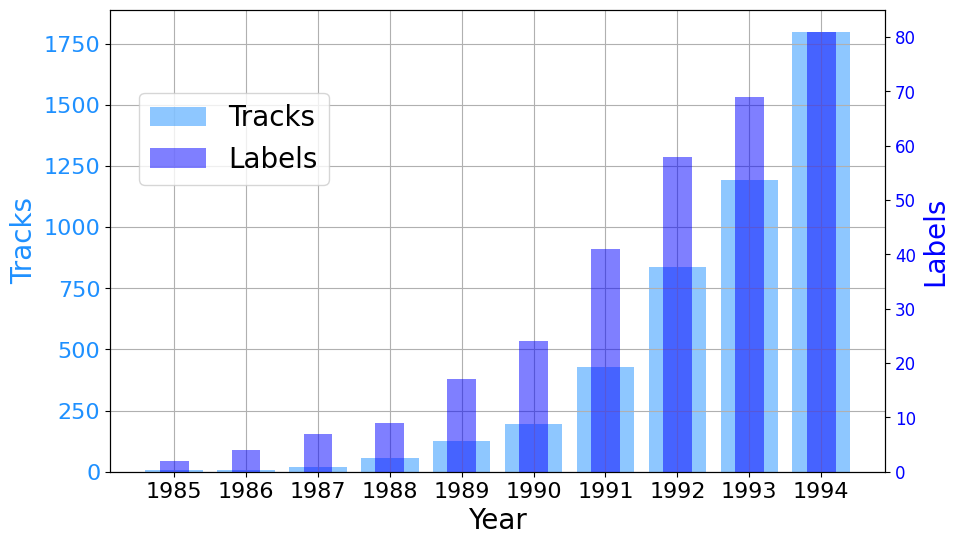

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Create a bar plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the first dataset (gertr)
bars1 = ax1.bar(np.arange(len(gertr)), gertr, color='dodgerblue', alpha=0.5, label='Tracks')
ax1.set_xlabel('Year',fontsize=20)
ax1.set_ylabel('Tracks', color='dodgerblue',fontsize=20)
ax1.tick_params(axis='y', labelcolor='dodgerblue',labelsize=16)

# Setting the custom x-ticks and labels
ax1.set_xticks(np.arange(len(gerye)))  # Set x-ticks to match the number of years
ax1.set_xticklabels(gerye, fontsize=16)  # Set custom tick labels

# Create a second y-axis for the second dataset (gerla)
ax2 = ax1.twinx()
bars2 = ax2.bar(np.arange(len(gerla)), gerla, color='blue', alpha=0.5, label='Labels', width=0.4)
ax2.set_ylabel('Labels', color='blue',fontsize=20)
ax2.tick_params(axis='y', labelcolor='blue',labelsize=12)

# Adding legends
fig.legend(loc='upper right', bbox_to_anchor=(0.3, 0.85), bbox_transform=ax1.transAxes,fontsize=20)

# Title and grid
#plt.title('Bar Diagram of Gertr and Gerla')
ax1.grid(True)

plt.savefig('tracks-labels-over-year-ger.pdf', bbox_inches='tight')

# Show the plot
plt.show()

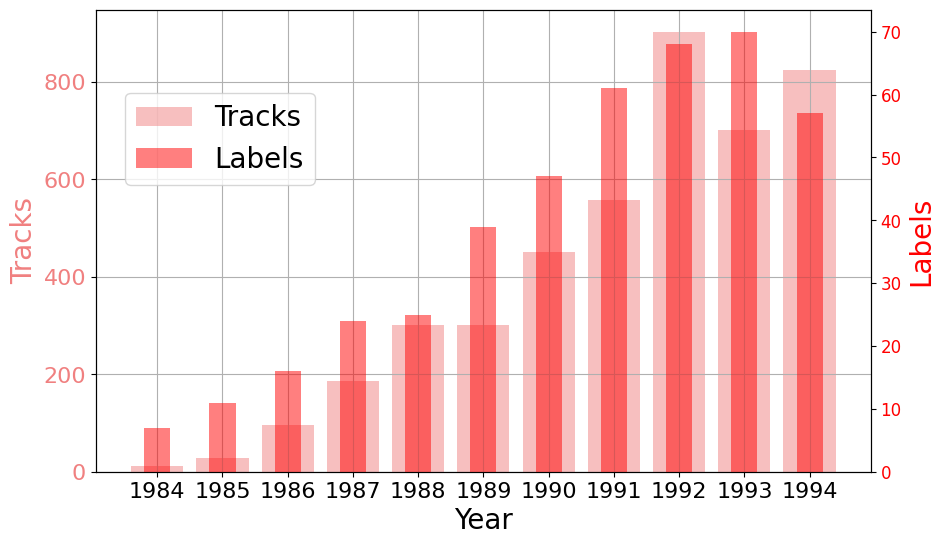

In [8]:
# Create a bar plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the first dataset (gertr)
bars1 = ax1.bar(np.arange(len(ustr)), ustr, color='lightcoral', alpha=0.5, label='Tracks')
ax1.set_xlabel('Year',fontsize=20)
ax1.set_ylabel('Tracks', color='lightcoral',fontsize=20)
ax1.tick_params(axis='y', labelcolor='lightcoral',labelsize=16)

# Setting the custom x-ticks and labels
ax1.set_xticks(np.arange(len(usye)))  # Set x-ticks to match the number of years
ax1.set_xticklabels(usye, fontsize=16)  # Set custom tick labels

# Create a second y-axis for the second dataset (gerla)
ax2 = ax1.twinx()
bars2 = ax2.bar(np.arange(len(usla)), usla, color='red', alpha=0.5, label='Labels', width=0.4)
ax2.set_ylabel('Labels', color='red',fontsize=20)
ax2.tick_params(axis='y', labelcolor='red',labelsize=12)

# Adding legends
fig.legend(loc='upper right', bbox_to_anchor=(0.3, 0.85), bbox_transform=ax1.transAxes,fontsize=20)

# Title and grid
#plt.title('Bar Diagram of Gertr and Gerla')
ax1.grid(True)

plt.savefig('tracks-labels-over-year-usa.pdf', bbox_inches='tight')

# Show the plot
plt.show()